<font size=40>Линейная регрессия


#Введение

Цель работы - предсказать стоимость коттеджа по его признакам.

**Описание переменных**

PRICE - стоимость коттеджа в тысячах долларов США

HOUSE - площадь коттеджа в квадратных метрах

AREA - площадь участка в сотках

DIST - расстояние от расположения недвижимости до автомобильной дороги(например, до кольцевой автодороги) в километрах.

ECO - индикатор, принимающий значение 1, если рядом с коттеджом есть река или озера, и 0 - если водоемов рядов с коттеджом нет

#Подготовка данных

Подключаем библиотеки pandas, matplotlib.pyplot, numpy, stats:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Подключаем необходимые инструменты из пакета Scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Импортируем данные

In [ ]:
ds = pd.read_excel("Info.xlsx", skiprows = 1, sheet_name = 'V(1)')
ds

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Price,House,Area,Dist,Eco
0,220.0,500,40.0,26.0,1
1,95.0,530,19.0,23.0,0
2,45.0,350,7.0,25.0,0
3,120.0,150,10.0,26.0,1
4,95.0,370,15.0,45.0,1
5,120.0,300,24.0,20.0,1
6,16.5,78,8.5,60.0,0
7,25.0,80,10.0,50.0,1
8,20.0,65,6.0,25.0,0
9,20.0,90,6.0,45.0,0


Выделим целевую переменную Price в переменную y1

In [ ]:
y1 = ds['Price']
y1

0     220.0
1      95.0
2      45.0
3     120.0
4      95.0
5     120.0
6      16.5
7      25.0
8      20.0
9      20.0
10    100.0
11     25.0
12     50.0
13      8.5
14     16.5
15    320.0
16    300.0
17     60.0
18     14.0
19     38.0
20     85.0
21     85.0
22     28.0
23     83.0
24     80.0
25     15.0
26     27.0
27     42.0
28      5.5
29     47.0
30      5.0
31     59.0
32     27.0
33    270.0
34     96.0
35     95.0
36      6.0
37    120.0
38    135.0
39    315.0
40     10.0
41    230.0
42     15.0
43    130.0
44     16.5
45      7.0
46    110.0
47     13.0
Name: Price, dtype: float64

Выделим матрицу исходных признаков в переменную X1



In [ ]:
X1 = ds.drop('Price', axis = 1)
X1

,House,Area,Dist,Eco
0,500,40.0,26.0,1
1,530,19.0,23.0,0
2,350,7.0,25.0,0
3,150,10.0,26.0,1
4,370,15.0,45.0,1
5,300,24.0,20.0,1
6,78,8.5,60.0,0
7,80,10.0,50.0,1
8,65,6.0,25.0,0
9,90,6.0,45.0,0


Разделим выборку на обучающую и тестовую, отнеся в тестовую часть 20% данных, а в обучающую - остальные 80%.

Используем функцию train_test_split

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8)
X1_train, X1_test, y1_train, y1_test

(    House  Area   Dist  Eco
 42     46  15.0  100.0    0
 11     85  11.0   33.0    0
 8      65   6.0   25.0    0
 43    130  15.0   27.0    1
 40     36  12.0  105.0    0
 2     350   7.0   25.0    0
 14     60   8.0   51.0    0
 26    180  17.0   86.0    0
 12    100  10.0   85.0    1
 22     60   5.0   30.0    1
 3     150  10.0   26.0    1
 23    228  20.0   45.0    0
 25     36  10.0   46.0    1
 39    450  25.0   25.0    1
 5     300  24.0   20.0    1
 32    130   6.0   12.0    0
 6      78   8.5   60.0    0
 33    350  15.0   15.0    1
 24    200  20.0   25.0    1
 4     370  15.0   45.0    1
 47     70   6.0   50.0    1
 31    420  10.0    9.0    0
 35    200  14.0   25.0    0
 37    300  32.0   28.0    1
 28     36  12.0   85.0    0
 19     65   6.0   18.0    1
 17    170   6.0   18.0    0
 1     530  19.0   23.0    0
 34    300  15.0   39.0    0
 29    285  15.0   74.0    0
 21    210  20.0   19.0    0
 27    250  15.0   85.0    1
 38    170  15.0   30.0    1
 0     500  40

#Обучение модели

Введем новый объект - модель линейной регрессии

In [ ]:
model = LinearRegression(fit_intercept=True)

Обучаем модель на наших данных

In [ ]:
ml = model.fit(X1_train, y1_train)

Посмотрим на результат обучения. Оценки коэффициентов перед знаками

In [ ]:
ml.coef_

array([ 0.21674318,  2.28670225, -0.70358195, 56.49218973])

Оценка свободного коэффициента

In [ ]:
ml.intercept_

9.878674968566216

#Тестирование и оценка качества

##Оценка качества модели на обучающей выборке

Выполним предсказание значений целевой функции моделью с помощью метода predict

In [ ]:
y1_pred = ml.predict(X1_train)
y1_pred

array([-16.20880017,  30.23736548,  20.09764628, 109.85129892,
       -28.75424845,  84.15615433,   5.29420417,  27.25833752,
        51.1077392 ,  69.70150811, 103.4562332 ,  73.36897679,
        64.67587186, 203.48330234, 172.2030331 ,  43.33251822,
         4.00669495, 165.97778154, 137.86399653, 149.20518659,
        60.08400313, 117.44559476,  67.65159332, 184.86799548,
       -14.68260944,  81.51490966,  47.78075365, 152.01751729,
        81.76246609,  53.88595015,  87.76073029,  95.05272718,
       116.4102802 , 247.91741301, 162.28415903, 165.34256091,
       -26.29183344, 107.3809882 ])

Вычислим остатки - разности между имеющимися значениями и предсказанными значениями целевой переменной

In [ ]:
e_ml = y1_train - y1_pred
e_ml

42     31.208800
11     -5.237365
8      -0.097646
43     20.148701
40     38.754248
2     -39.156154
14     11.205796
26     -0.258338
12     -1.107739
22    -41.701508
3      16.543767
23      9.631023
25    -49.675872
39    111.516698
5     -52.203033
32    -16.332518
6      12.493305
33    104.022218
24    -57.863997
4     -54.205187
47    -47.084003
31    -58.445595
35     27.348407
37    -64.867995
28     20.182609
19    -43.514910
17     12.219246
1     -57.017517
34     14.237534
29     -6.885950
21     -2.760730
27    -53.052727
38     18.589720
0     -27.917413
41     67.715841
15    154.657439
30     31.291833
20    -22.380988
Name: Price, dtype: float64

Построим диаграмму остатков

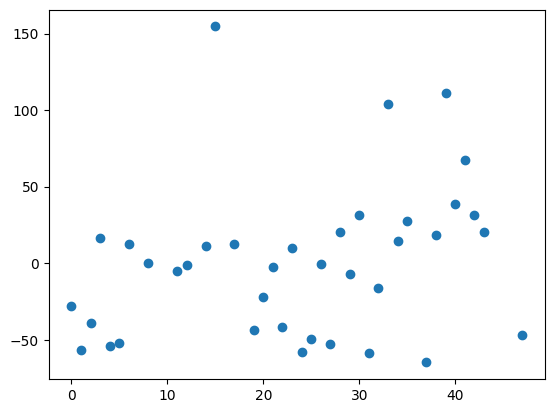

In [ ]:
plt.scatter(e_ml.index, e_ml)

Исходя из диаграммы, имеется сравнительно небольшое количество больших остатков. Значит, качество модели на обучающей выборке является высоким.

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [ ]:
R2_ml = metrics.explained_variance_score(y1_train, y1_pred)
R2_ml

0.645488241426928

Относительно низкая величина коэффициента детерминации подтверждает вывод о невысоком качестве модели на обучающей выборке

Вычислим метрику **MAPE** с помощью  функции mean_absolute_percentage_error

In [ ]:
mape_ml = metrics.mean_absolute_percentage_error(y1_train, y1_pred) * 100
mape_ml

97.3828741967026

Большая величина метрики (намного больше, чем 15) также говорит о невысоком качестве модели на обучающей выборке

###**Вывод**

Таким образом, исследуемая модель обладает невысоким качеством на обучающей выборке

Вычислим дополнительные характеристики - метрики MSE и MAE. Они потребуются для сравнения качества модели на обучающей и тестовой выборках.

Метрика MSE:

In [ ]:
mse_ml = metrics.mean_squared_error(y1_train, y1_pred)
mse_ml

2429.080751186773

Метрика MAE:

In [ ]:
mae_ml = metrics.mean_absolute_error(y1_train, y1_pred)
mae_ml

36.93511507357295

##Оценка качества модели на тестовой выборке

Выполним предсказание значений целевой функции моделью
с помощью метода predict

In [ ]:
y1_test_pred = ml.predict(X1_test)
y1_test_pred

array([ 71.3982439 , -14.33118391, 108.49467871,  41.20680457,
        11.44458672,  67.97394855,   3.54818037, -16.20880017,
       225.79223172, 189.30394644])

Вычислим остатки - разности между имеющимися значениями и предсказанными значениями целевой переменной

In [ ]:
e_test_ml = y1_test - y1_test_pred
e_test_ml

7     -46.398244
36     20.331184
46      1.505321
18    -27.206805
9       8.555413
13    -59.473949
44     12.951820
45     23.208800
10   -125.792232
16    110.696054
Name: Price, dtype: float64

Построим диаграмму остатков

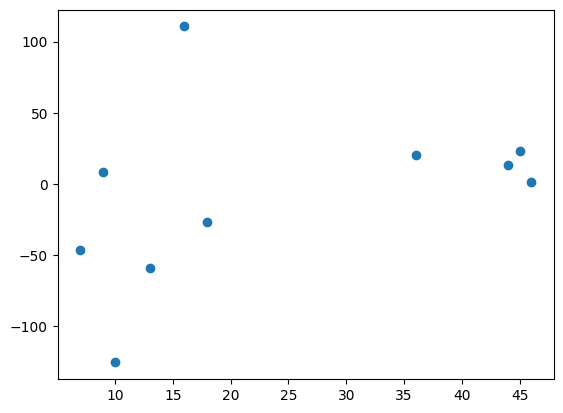

In [ ]:
plt.scatter(e_test_ml.index, e_test_ml)

Исходя из диаграммы, имеется сравнительно небольшое количество больших остатков. Значит, качество модели на обучающей выборке является высоким.

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [ ]:
R2_test_ml = metrics.explained_variance_score(y1_test, y1_test_pred)
R2_test_ml

0.5444226386221789

Вычислим метрику MAPE с помощью функции mean_absolute_percentage_error

In [ ]:
mape_test_ml = metrics.mean_absolute_percentage_error(y1_test, y1_test_pred) * 100
mape_test_ml

203.53604927591851

Напротив, большая величина метрики (намного больше, чем 15) также говорит о невысоком качестве модели на тестирующей выборке

###**Вывод**

Таким образом, исследуемая модель обладает более высоким качеством на обучающей выборке, нежели на обучающей выборке

Вычислим дополнительные характеристики - метрики MSE и MAE. Они потребуются для сравнения качества модели на обучающей и тестовой выборках.

Метрика MSE:

In [ ]:
mse_test_ml = metrics.mean_squared_error(y1_test, y1_test_pred)
mse_test_ml

3570.2675808692197

In [ ]:
mae_test_ml = metrics.mean_absolute_error(y1_test, y1_test_pred)
mae_test_ml

43.61198205800398

Составим таблицу из значений найденных метрик на обучающей и тестовой выборках

In [ ]:
ind = ['R', 'MAPE', 'MSE', 'MAE']
dat1 = [R2_ml, mape_ml, mse_ml, mae_ml]
dat2 = [R2_test_ml, mape_test_ml, mse_test_ml, mae_test_ml]

pd.DataFrame({
    'Metrics': ['R', 'MAPE', 'MSE', 'MAE'],
    'Train': [R2_ml, mape_ml, mse_ml, mae_ml],
    'Test': [R2_test_ml, mape_test_ml, mse_test_ml, mae_test_ml]
})

,Metrics,Train,Test
0,R,0.645488,0.544423
1,MAPE,97.382874,203.536049
2,MSE,2429.080751,3570.267581
3,MAE,36.935115,43.611982


#Улучшение качества модели

##Очистка данных

Построим диаграмму рассеяния, расположив выборочные значения стоимости коттеджа по горизонтальной оси

Text(0.5, 0, 'Выборочные значения')

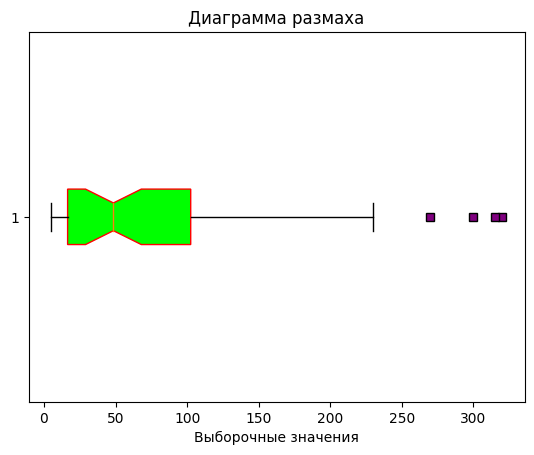

In [ ]:
box = plt.boxplot(ds.Price, vert = False, notch = True, patch_artist = True,
                  flierprops = dict(markerfacecolor = 'purple', marker = 's'),
                  boxprops = dict(color = 'red', facecolor = 'lime' ))
plt.title("Диаграмма размаха")
plt.xlabel("Выборочные значения")

В выборке, по-видимому, присутствуют аномальные данные.
Генеральная совокупность возможно не симметрична (усы разной длины).

Выберем данные с помощью условия *Price < 250*

In [ ]:
ds2 = ds[ds.Price < 250]
ds2

,Price,House,Area,Dist,Eco
0,220.0,500,40.0,26.0,1
1,95.0,530,19.0,23.0,0
2,45.0,350,7.0,25.0,0
3,120.0,150,10.0,26.0,1
4,95.0,370,15.0,45.0,1
5,120.0,300,24.0,20.0,1
6,16.5,78,8.5,60.0,0
7,25.0,80,10.0,50.0,1
8,20.0,65,6.0,25.0,0
9,20.0,90,6.0,45.0,0


После выборки данных с помощью условия Price < 250, были убраны аномальные данные

In [ ]:
dif = len(ds) - len(ds2)
dif

4

Выделим целевую переменную Price в переменную y2

In [ ]:
y2 = ds2['Price']
y2

0     220.0
1      95.0
2      45.0
3     120.0
4      95.0
5     120.0
6      16.5
7      25.0
8      20.0
9      20.0
10    100.0
11     25.0
12     50.0
13      8.5
14     16.5
17     60.0
18     14.0
19     38.0
20     85.0
21     85.0
22     28.0
23     83.0
24     80.0
25     15.0
26     27.0
27     42.0
28      5.5
29     47.0
30      5.0
31     59.0
32     27.0
34     96.0
35     95.0
36      6.0
37    120.0
38    135.0
40     10.0
41    230.0
42     15.0
43    130.0
44     16.5
45      7.0
46    110.0
47     13.0
Name: Price, dtype: float64

Выделим матрицу исходных признаков в переменную X2

In [ ]:
X2 = ds2.drop('Price', axis = 1)
X2

,House,Area,Dist,Eco
0,500,40.0,26.0,1
1,530,19.0,23.0,0
2,350,7.0,25.0,0
3,150,10.0,26.0,1
4,370,15.0,45.0,1
5,300,24.0,20.0,1
6,78,8.5,60.0,0
7,80,10.0,50.0,1
8,65,6.0,25.0,0
9,90,6.0,45.0,0


Обучим модель с помощью выборки, не разделяя ее на обучающую и тестовую части

In [ ]:
ml2 = model.fit(X2, y2)

Найдем предсказанные моделью значения зависимой переменной

In [ ]:
y2_pred = ml2.predict(X2)

<!-- R2 -->
Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [ ]:
R2test_m2 = metrics.explained_variance_score(y2, y2_pred)
R2test_m2

0.7166463357391579

Коэффициент детерминации стал больше по сравнению с предыдущей моделью, но несущественно. Попробуем отобрать данные, убирая в таблице ds2 строку, у которой в модели m2 самый большой остаток

In [ ]:
e_ml2 = y2 - y2_pred
e_ml2

0      14.497845
1     -19.862234
2     -11.145696
3      48.783108
4      -2.508008
5     -16.230129
6       2.204046
7     -25.118789
8      -5.715462
9       3.953468
10    -42.228673
11    -14.639330
12     19.056992
13    -49.584985
14      0.178156
17     20.099410
18    -13.502539
19    -16.489402
20    -12.086023
21     -5.253930
22    -15.420587
23      6.692510
24    -30.250527
25    -33.349374
26     -9.956872
27    -20.027990
28     -1.543752
29     -0.415934
30     10.714397
31    -23.531829
32    -12.715268
34     26.084899
35     29.518723
36      7.123753
37    -38.360061
38     47.450685
40     14.999024
41    115.253847
42      5.933651
43     44.442423
44     -8.569358
45     -2.066349
46     36.281892
47    -22.695729
Name: Price, dtype: float64

Удалим в исходной матрице данных строки с достаточно большими значениями

In [ ]:
ds3 = ds2.drop(labels = [38], axis = 0)


Выделим целевую переменную Price в переменную y3

In [ ]:
y3 = ds3['Price']
y3

0     220.0
1      95.0
2      45.0
3     120.0
4      95.0
5     120.0
6      16.5
7      25.0
8      20.0
9      20.0
10    100.0
11     25.0
12     50.0
13      8.5
14     16.5
17     60.0
18     14.0
19     38.0
20     85.0
21     85.0
22     28.0
23     83.0
24     80.0
25     15.0
26     27.0
27     42.0
28      5.5
29     47.0
30      5.0
31     59.0
32     27.0
34     96.0
35     95.0
36      6.0
37    120.0
40     10.0
41    230.0
42     15.0
43    130.0
44     16.5
45      7.0
46    110.0
47     13.0
Name: Price, dtype: float64

Выделим матрицу исходных признаков в переменную X3

In [ ]:
X3 = ds3.drop('Price', axis=1)
X3

,House,Area,Dist,Eco
0,500,40.0,26.0,1
1,530,19.0,23.0,0
2,350,7.0,25.0,0
3,150,10.0,26.0,1
4,370,15.0,45.0,1
5,300,24.0,20.0,1
6,78,8.5,60.0,0
7,80,10.0,50.0,1
8,65,6.0,25.0,0
9,90,6.0,45.0,0


Обучим модель  с помощью выборки, не разделяя ее на обучающую и тестовую части

In [ ]:
m3 = model.fit(X3, y3)

Найдем предсказанные моделью значения зависимой переменной

In [ ]:
y3_pred = m3.predict(X3)

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [ ]:
R2test_m3 = metrics.explained_variance_score(y3, y3_pred)
R2test_m3

0.7230298103460846

In [ ]:
e_m3 = y3 - y3_pred
e_m3

0      17.156682
1     -20.739551
2     -11.750696
3      51.686436
4      -1.140533
5     -13.188323
6       2.251399
7     -22.507833
8      -4.721237
9       4.218965
10    -41.091947
11    -13.695996
12     20.530924
13    -46.397363
14      0.562847
17     20.686549
18    -11.881805
19    -13.097056
20    -11.739486
21     -4.092122
22    -12.408819
23      6.991377
24    -27.011469
25    -30.365653
26    -10.753447
27    -19.128399
28     -1.771752
29     -1.593318
30     10.075271
31    -23.898452
32    -11.720328
34     25.840804
35     30.205208
36      7.120383
37    -35.073439
40     14.187822
41    117.354429
42      5.389325
43     47.731821
44     -8.442891
45     -2.610675
46     39.097960
47    -20.265612
Name: Price, dtype: float64

Коэффициент детерминации стал больше по сравнению с предыдущей моделью, но несущественно. Попробуем отобрать данные, убирая в таблице ds3 строку, у которой в модели m3 самый большой остаток

In [ ]:
ds4 = ds3.drop(labels = [41], axis = 0)

Выделим целевую переменную Price в переменную y4

In [ ]:
y4 = ds4['Price']

Выделим матрицу исходных признаков в переменную X4

In [ ]:
X4 = ds4.drop('Price', axis=1)

Обучим модель  с помощью выборки, не разделяя ее на обучаую и тестовую части

In [ ]:
m4 = model.fit(X4, y4)

Найдем предсказанные моделью значения зависимой переменной

In [ ]:
y4_pred = m4.predict(X4)

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [ ]:
R2test_m4 = metrics.explained_variance_score(y4, y4_pred)
R2test_m4

0.7946536725088469

In [ ]:
e_m4 = y4 - y4_pred
e_m4

0     28.458609
1    -12.927500
2     -7.211270
3     57.235774
4     10.046890
5     -5.463533
6      0.616848
7    -18.089204
8     -7.392468
9      2.745387
10   -25.054164
11   -16.170548
12    26.435571
13   -43.899448
14    -1.730063
17    20.517117
18    -6.973229
19    -9.521360
20    -9.372275
21    -4.716295
22    -8.520275
23     7.551808
24   -21.284313
25   -27.188032
26    -9.962957
27    -9.911086
28    -4.167638
29     1.775719
30     8.172894
31   -18.329548
32   -13.083620
34    28.622585
35    30.137957
36     4.815823
37   -27.989052
40    12.347616
42     3.343485
43    52.256193
44   -10.926542
45    -4.656515
46    45.133092
47   -15.672434
Name: Price, dtype: float64

Коэффициент детерминации стал больше по сравнению с предыдущей моделью, но несущественно. Попробуем отобрать данные, убирая в таблице ds4 строку, у которой в модели m4 самый большой остаток

In [ ]:
ds5 = ds4.drop(labels = [3], axis = 0)

Выделим целевую переменную Price в переменную y5

In [ ]:
y5 = ds5['Price']

Выделим матрицу исходных признаков в переменную X5

In [ ]:
X5 = ds5.drop('Price', axis=1)

Обучим модель  с помощью выборки, не разделяя ее на обучаую и тестовую части

In [ ]:
m5 = model.fit(X5, y5)

Найдем предсказанные моделью значения зависимой переменной

In [ ]:
y5_pred = m5.predict(X5)

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [ ]:
R2test_m5 = metrics.explained_variance_score(y5, y5_pred)
R2test_m5

0.824750403982233

Коэффициент детерминации превысил величину 0,8. Перейдем к обучению данной модели.

##Обучение модели

Разделим выборку на обучающую и тестовую, отнеся в тестовую часть 20% данных, а в обучающую - остальные 80%.

Используем функцию train_test_split

In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, train_size = 0.8)
X5_train, X5_test, y5_train, y5_test

(    House  Area   Dist  Eco
 1     530  19.0   23.0    0
 9      90   6.0   45.0    0
 4     370  15.0   45.0    1
 22     60   5.0   30.0    1
 28     36  12.0   85.0    0
 20    320  20.0   25.0    0
 30     36  10.0   95.0    0
 26    180  17.0   86.0    0
 8      65   6.0   25.0    0
 35    200  14.0   25.0    0
 19     65   6.0   18.0    1
 13     22  14.0   50.0    1
 43    130  15.0   27.0    1
 25     36  10.0   46.0    1
 5     300  24.0   20.0    1
 42     46  15.0  100.0    0
 23    228  20.0   45.0    0
 2     350   7.0   25.0    0
 7      80  10.0   50.0    1
 24    200  20.0   25.0    1
 14     60   8.0   51.0    0
 12    100  10.0   85.0    1
 21    210  20.0   19.0    0
 34    300  15.0   39.0    0
 10    600  15.0    7.0    1
 0     500  40.0   26.0    1
 27    250  15.0   85.0    1
 31    420  10.0    9.0    0
 29    285  15.0   74.0    0
 46    170  10.0   25.0    1
 44     56  15.0   75.0    0
 11     85  11.0   33.0    0,
     House  Area   Dist  Eco
 45     46  1

Введем новый объект - модель линейной регрессии

In [ ]:
model_cleared_data = LinearRegression(fit_intercept=True)

Обучаем модель на наших данных

In [ ]:
ml_cleared = model_cleared_data.fit(X5_train, y5_train)

Посмотрим на результат обучения. Оценки коэффициентов перед признаками

In [ ]:
ml_cleared.coef_

array([ 0.06937784,  4.00053601, -0.5776625 , 15.96769061])

Оценка свободного коэффициента

In [ ]:
ml_cleared.intercept_

8.084576604342246

##Тестирование и оценка качества

###Оценка качества модели на обучающей выборке

Выполним предсказание значений целевой функции моделью
с помощью метода predict

In [ ]:
y5_pred_ = ml_cleared.predict(X5_train)
y5_pred_

array([107.57877976,  12.33698605,  83.73529659,  30.88774285,
         9.48729871,  95.8546439 ,  -4.2903983 ,  38.90272555,
        22.15578996,  63.52608676,  42.16711806,  52.70295899,
        77.48253943,  39.98275473, 129.3252342 ,  13.51774769,
        77.91863245,  45.92901101,  40.72472979, 103.49699344,
        14.79074782,  21.89409919,  91.68905625,  66.37713202,
       121.64337524, 203.74340386,  52.30345559,  72.02966798,
        45.11827694,  61.41029805,  28.65308857,  38.92472688])

Вычислим остатки - разности между имеющимися значениями и предсказанными значениями целевой переменной

In [ ]:
e_cleared_ml = y5_train - y5_pred_
e_cleared_ml

1    -12.578780
9      7.663014
4     11.264703
22    -2.887743
28    -3.987299
20   -10.854644
30     9.290398
26   -11.902726
8     -2.155790
35    31.473913
19    -4.167118
13   -44.202959
43    52.517461
25   -24.982755
5     -9.325234
42     1.482252
23     5.081368
2     -0.929011
7    -15.724730
24   -23.496993
14     1.709252
12    28.105901
21    -6.689056
34    29.622868
10   -21.643375
0     16.256596
27   -10.303456
31   -13.029668
29     1.881723
46    48.589702
44   -12.153089
11   -13.924727
Name: Price, dtype: float64

Построим диаграмму остатков

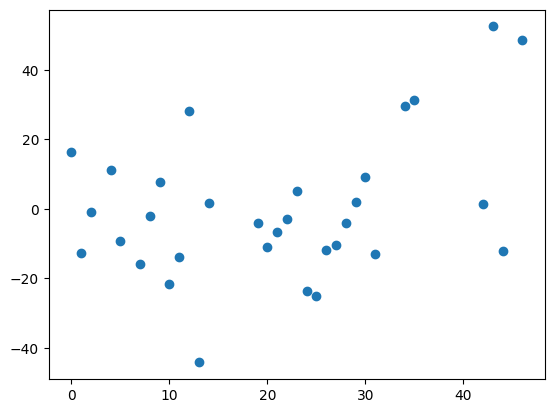

In [ ]:
plt.scatter(e_cleared_ml.index, e_cleared_ml)

Исходя из диаграммы, имеется много больших остатков. Значит, качество модели на обучающей выборке является невысоким.

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [ ]:
R2_cleared_ml = metrics.explained_variance_score(y5_train, y5_pred_)
R2_cleared_ml

0.8108603200060821

Значение R2 больше 0.8, это значит, что модель хорошо показывает на обучающей выборке

Вычислим метрику MAPE с помощью функции mean_absolute_percentage_error

In [ ]:
mape_cleared_ml = metrics.mean_absolute_percentage_error(y5_train, y5_pred_) * 100
mape_cleared_ml

51.479112600655256

Вычислим дополнительные характеристики - метрики MSE и MAE. Они потребуются для сравнения качества модели на обучающей и тестовой выборках.

Метрика MSE:

In [ ]:
mse_cleared_ml = metrics.mean_squared_error(y5_train, y5_pred_)
mse_cleared_ml

418.9909372796517

Метрика MAE:

In [ ]:
mae_cleared_ml = metrics.mean_absolute_error(y5_train, y5_pred_)
mae_cleared_ml

15.308696966041538

###Оценка качества модели на тестовой выборке

Выполним предсказание значений целевой функции моделью с помощью метода predict

In [ ]:
y5_test_pred = ml_cleared.predict(X5_test)
y5_test_pred

array([ 13.51774769,  20.23120902,  24.02880732,  33.48410089,
        12.8408545 ,  -2.06595126,  34.17496219,  -2.9626674 ,
       156.70822231])

Вычислим остатки - разности между имеющимися значениями и предсказанными значениями целевой переменной

In [ ]:
e_cleared_test_ml = y5_test - y5_test_pred
e_cleared_test_ml

45    -6.517748
18    -6.231209
47   -11.028807
17    26.515899
6      3.659146
40    12.065951
32    -7.174962
36     8.962667
37   -36.708222
Name: Price, dtype: float64

Построим диаграмму остатков

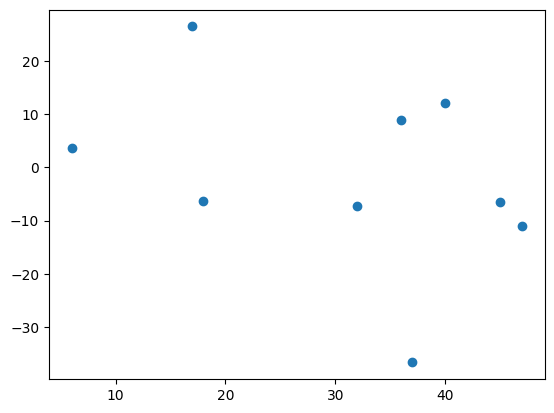

In [ ]:
plt.scatter(e_cleared_test_ml.index, e_cleared_test_ml)

Исходя из диаграммы, имеется немного больших остатков. Значит, качество модели на тестовой выборке является высоким.

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [ ]:
R2_cleared_test_ml = metrics.explained_variance_score(y5_test, y5_test_pred)
R2_cleared_test_ml

0.7763125115580085

Вычислим метрику MAPE с помощью функции mean_absolute_percentage_error

In [ ]:
mape_cleared_test_ml = metrics.mean_absolute_percentage_error(y5_test, y5_test_pred) * 100
mape_cleared_test_ml

68.44750255462316

###**Вывод**

Таким образом, исследуемая модель обладает более высоким качеством на тестовой выборке, нежели на обучающей выборке, то есть модель недообучена

Вычислим дополнительные характеристики - метрики MSE и MAE. Они потребуются для сравнения качества модели на обучающей и тестовой выборках.

Метрика MSE:

In [ ]:
mse_cleared_test_ml = metrics.mean_squared_error(y5_test, y5_test_pred)
mse_cleared_test_ml

282.70178865934963

Метрика MAE:

In [ ]:
mae_cleared_test_ml = metrics.mean_absolute_error(y5_test, y5_test_pred)
mae_cleared_test_ml

13.207179089677235

In [ ]:
ind = ['R2', 'MAPE', 'MSE', 'MAE']
dat1 = [R2_cleared_ml, mape_cleared_ml, mse_cleared_ml, mae_cleared_ml]
dat2 = [R2_cleared_test_ml, mape_cleared_test_ml, mse_cleared_test_ml, mae_cleared_test_ml]

pd.DataFrame({
    'Metrics': ['R2', 'MAPE', 'MSE', 'MAE'],
    'Train': [R2_cleared_ml, mape_cleared_ml, mse_cleared_ml, mae_cleared_ml],
    'Test': [R2_cleared_test_ml, mape_cleared_test_ml, mse_cleared_test_ml, mae_cleared_test_ml]
})

,Metrics,Train,Test
0,R2,0.810860,0.776313
1,MAPE,51.479113,68.447503
2,MSE,418.990937,282.701789
3,MAE,15.308697,13.207179


Вывод:

$R^2$ стал лучше на тестовой выборке, но MAPE стали хуже на тестовой выборке, а MSE, MAE хуже на обучающей выборке, следовательно нельзя сказать модель переобучена или недообучена.

#Заключение

Целью нашей работы было: предсказать стоимость коттеджа по его признакам. Мы провели тестирование и оценку качества модели на обучающей и тестовой выборках используя модель линейной регрессии, пользуясь библиотеками pandas, matplotlib.pyplot, numpy и stats и необходимыми нам инструментами пакета Scikit-learn.

Мы улучшили качество модели посредством дополнительной очистки данных и ее переобучения.

Проведя повторную оценку и тестирование модели, мы не можем сделать вывод, что данная модель получилась переобученной или недообученой, так как она показывает половину хороших результатов на тестовой выборке и половину хороших на обучающей выборке.